In [1]:
from __future__ import division, unicode_literals, print_function  # for compatibility with Python 2 and 3
import sys
!{sys.executable} -m pip install opencv-python
!{sys.executable} -m pip install pims
!{sys.executable} -m pip install trackpy
!{sys.executable} -m pip install scikit-image

import matplotlib as mpl
import matplotlib.pyplot as plt
import cv2
# change the following to %matplotlib notebook for interactive plotting
%matplotlib inline

# Optionally, tweak styles.
mpl.rc('figure',  figsize=(10, 5))
mpl.rc('image', cmap='gray')

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [2]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series  # for convenience

import pims
import trackpy as tp

/home/emma/.local/lib/python3.8/site-packages/skimage/io/manage_plugins.py:23: UserWarning: Your installed pillow version is < 7.1.0. Several security issues (CVE-2020-11538, CVE-2020-10379, CVE-2020-10994, CVE-2020-10177) have been fixed in pillow 7.1.0 or higher. We recommend to upgrade this library.
  from .collection import imread_collection_wrapper


In [4]:
vidFile = '/home/emma/repos/mmbl-track/media/tpa/210413180446'
frames = pims.ImageSequence(vidFile + '/*.png')

In [5]:
frames

<Frames>
Source: /home/emma/repos/mmbl-track/media/tpa/210413180446/*.png
Length: 1288 frames
Frame Shape: (684, 896, 3)
Pixel Datatype: uint8

Frame([[[179, 179, 179],
        [171, 171, 171],
        [181, 181, 181],
        ...,
        [137, 137, 137],
        [146, 146, 146],
        [138, 138, 138]],

       [[195, 195, 195],
        [187, 187, 187],
        [197, 197, 197],
        ...,
        [159, 159, 159],
        [161, 161, 161],
        [150, 150, 150]],

       [[185, 185, 185],
        [176, 176, 176],
        [187, 187, 187],
        ...,
        [151, 151, 151],
        [159, 159, 159],
        [151, 151, 151]],

       ...,

       [[196, 196, 196],
        [194, 194, 194],
        [189, 189, 189],
        ...,
        [160, 157, 161],
        [160, 157, 161],
        [160, 157, 161]],

       [[174, 168, 175],
        [171, 165, 172],
        [166, 160, 167],
        ...,
        [136, 127, 138],
        [139, 130, 141],
        [139, 130, 141]],

       [[134, 128, 135],
        [136, 130, 137],
        [141, 135, 142],
        ...,
        [108,  99, 110],
        [111, 102, 113],
        [111, 102, 113]]], dtype=uint8)
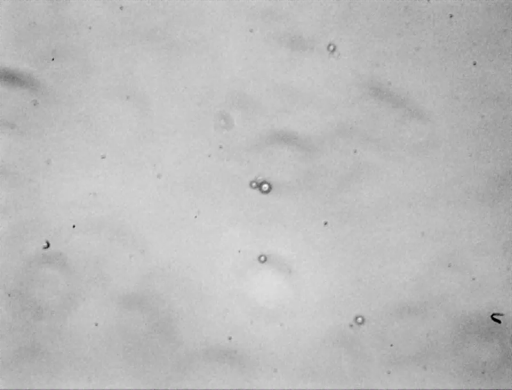

In [6]:
frames[0]

In [8]:
frames = pims.as_grey(frames)
f = tp.locate(frames[620], 31, invert=True, minmass = 3850)

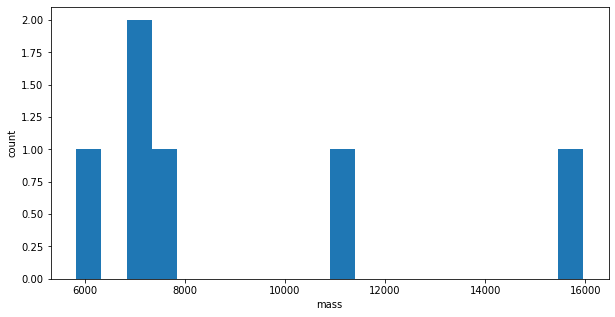

In [9]:
fig, ax = plt.subplots()
ax.hist(f['mass'], bins=20)

# Optionally, label the axes.
ax.set(xlabel='mass', ylabel='count');

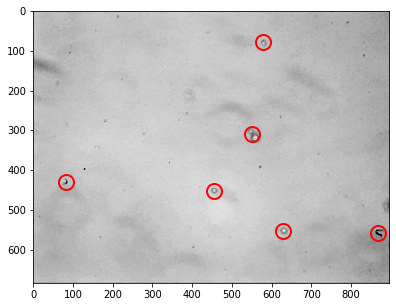

In [10]:
plt.figure()  # make a new figure
tp.annotate(f, frames[620]);

In [11]:
f = tp.batch(frames[180:1200],diameter= 31, invert=True, minmass = 3850);


Frame 203: 6 features


KeyboardInterrupt: 

In [ ]:
t = tp.link_df(f, 25, memory=15)


In [ ]:
t.head()


In [ ]:
t1 = tp.filter_stubs(t, 180)
# Compare the number of particles in the unfiltered and filtered data.
print('Before:', t['particle'].nunique())
print('After:', t1['particle'].nunique())

In [ ]:
plt.figure()
tp.annotate(t1[t1['frame'] == 0], frames[0]);

In [ ]:
plt.figure()
tp.plot_traj(t1, label = True);